<a href="https://colab.research.google.com/github/lanyu0322/pedestrian_firstdraft_figures/blob/master/figure7_wamp_restaurants_park.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import time
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -- install geopandas
try:
  import geopandas as gp
except:
  !pip install geopandas

     |████████████████████████████████| 931kB 2.7MB/s 
     |████████████████████████████████| 14.7MB 281kB/s 
     |████████████████████████████████| 10.9MB 48.0MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# -- read in the parameters from 4 pop fit
fname = os.path.join("drive", "My Drive", "lwir", "data", "4_pop_fit", 
                     "4pop_para.csv")
# -- "4pop_para.csv" is calculated in notebook called "4_population_fit_constraint"
parr = pd.read_csv(fname)
parr

,m1,m2,m3,sd1,sd2,sd3,scl1,scl2,scl3,wamp,off,lat,lon,rstrant,parkarea,sratio,w_manhattan,r_manhattan,f
0,33.851518,55.863352,72.488416,3.918518,5.293085,5.114898,26.033345,15.170120,42.159781,0.005339,0.898990,40.761268,-73.983564,180,0.000000,0.444916,19861.575731,686.304649,0.460290
1,30.868148,60.345837,75.860100,6.938260,8.000000,3.259311,4.720661,3.195976,1.740353,0.000612,-0.033425,40.770207,-73.986869,8,0.000000,0.989311,3871.237562,1712.178205,1.426865
2,36.113705,54.646821,73.313140,6.249098,8.000000,5.752989,58.303856,37.709084,38.905899,0.004441,-0.033366,40.718427,-73.994830,201,58445.164287,0.775829,3115.066002,1024.629008,1.031020
3,33.243216,50.212947,70.062318,4.659591,7.376655,8.000000,19.616057,16.374775,26.483938,0.000786,0.127762,40.786516,-73.952456,36,19998.479164,0.710402,664.869474,2083.624285,2.936722
4,32.290951,50.613295,80.000000,5.238203,8.000000,8.000000,14.645069,8.523019,13.630831,0.006409,-0.099433,40.752424,-74.000899,10,27738.524376,0.602847,600.262988,114.241471,0.717580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,32.926378,57.179910,80.000000,4.349540,8.000000,8.000000,12.543598,4.038215,4.672271,0.006076,-0.058044,40.728600,-74.005356,75,45502.597890,0.469127,4789.079473,619.321194,0.529794
112,29.228765,48.527859,79.664739,6.109451,8.000000,2.181421,2.029587,3.727794,0.473037,0.000255,0.043587,40.807061,-73.933681,0,233456.280673,2.979109,204.270486,33.049144,3.461102
113,33.755604,51.192035,72.037956,5.009728,4.035027,4.868089,5.016228,1.949644,3.240852,0.000600,0.034900,40.761216,-73.957815,5,22530.378565,0.472236,4741.542367,1805.796279,0.652085
114,33.788794,51.541210,69.319872,5.326899,6.808572,7.190802,76.585198,108.585741,114.617837,0.002720,0.278869,40.702389,-74.012806,88,119851.579490,1.135816,17701.876761,426.143228,1.163159


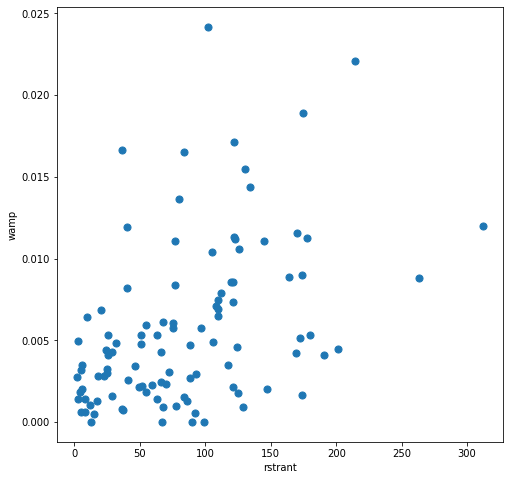

In [ ]:
# -- create a scatter plot of restaurant and wamp 
sub0 = parr[parr["rstrant"] > 0].copy()
sub0["wamp"] = sub0["wamp"] 
sub0.plot.scatter("rstrant", "wamp", figsize=[8, 8], vmax=2, s=50)




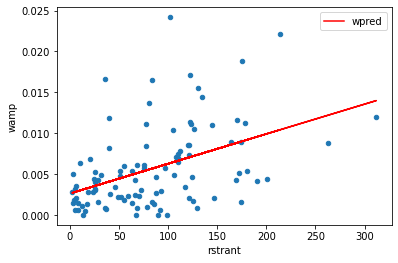

In [ ]:
# -- create a linear prediction of restaurant and wamp plot
import statsmodels.formula.api as sm
sub0["wpred"] = sm.ols("wamp ~ rstrant", data=sub0).fit().predict(sub0)
ax = sub0.plot.scatter("rstrant", "wamp")
sub0.plot("rstrant", "wpred", c = "r", ax=ax)

prediction = os.path.join("drive", "My Drive", "lwir", "output", "figure7",
                       "prediction wamp & rstrant.png")
plt.savefig(prediction)


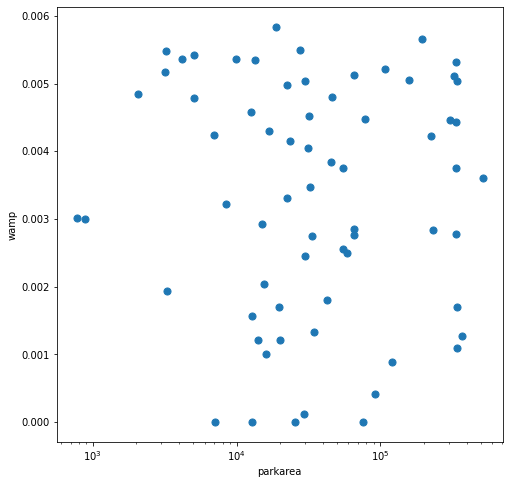

In [ ]:
# -- create a scatter plot of park area and wamp 
sub1 = parr[parr["parkarea"] > 0].copy()
sub1["wamp"] = sub1["wamp"] 
sub1.plot.scatter("parkarea", "wamp", logx=True, figsize=[8, 8], vmax=2, s=50)




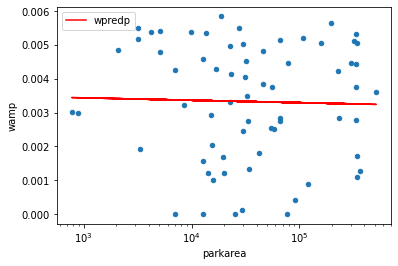

In [ ]:
# -- create a linear prediction of parkarea and wamp plot
sub1["lparea"] = np.log10(sub1["parkarea"])
sub1["wpredp"] = sm.ols("wamp ~ lparea", data=sub1).fit().predict(sub1)
ax = sub1.plot.scatter("parkarea", "wamp")
sub1.plot("parkarea", "wpredp", logx=True, c = "r", ax=ax)

outfile = os.path.join("drive", "My Drive", "lwir", "output", "figure7"
                       "prediction wamp & parkarea.png")
plt.savefig(outfile)
